In [1]:
from src.helpers.experiment import create_tsfresh_dataframe
from src.helpers.diabetes.cega import clarke_error_grid
from src.helpers.diabetes.madex import mean_adjusted_exponent_error
from pycaret.regression import setup, create_model, compare_models, predict_model
from loguru import logger
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas

In [2]:
train_parameters = {
    'ohio_no': 570,
    'scope': 'train',
    'train_ds_size': 0,
    'window_size': 6,
    'prediction_horizon': 1,
    'minimal_features': False,
}

unseen_data_parameters = {
    'ohio_no': 570,
    'scope': 'test',
    'train_ds_size': 0,
    'window_size': 6,
    'prediction_horizon': 1,
    'minimal_features': False,
}

# output = run_experiment(parameters, test_parameters)

2021-06-26 09:02:51.668 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/570_train_0_6_1.pkl
2021-06-26 09:02:51.819 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 570, 'scope': 'train', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


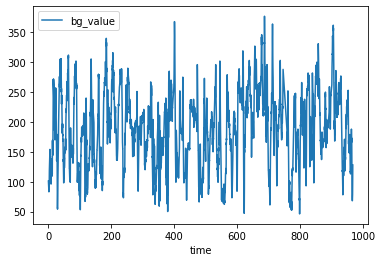

2021-06-26 09:02:52.180 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-26 09:02:52.181 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/570_train_0_6_1.pkl


In [3]:
source_df = create_tsfresh_dataframe(train_parameters)
clean_df = source_df.drop(
    columns=['start', 'end', 'start_time', 'end_time'])

In [4]:
regressor = setup(clean_df,
    target='label',
    feature_selection=True,
    html=True,
    silent=True,
    session_id=1974
    )

,Description,Value
0,session_id,1974
1,Target,label
2,Original Data,"(10976, 788)"
3,Missing Values,True
4,Numeric Features,256
5,Categorical Features,531
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7683, 232)"


In [5]:
best3 = compare_models(
    exclude=['catboost', 'xgboost'],
    sort='RMSE',
    n_select=3,
    verbose=True
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.9347,22.5068,4.7075,0.9942,0.0311,0.0179,0.4800
omp,Orthogonal Matching Pursuit,3.0131,22.7345,4.7247,0.9941,0.0316,0.0189,0.0260
gbr,Gradient Boosting Regressor,3.0902,23.4609,4.8097,0.9939,0.0314,0.0189,3.4790
et,Extra Trees Regressor,2.9741,24.1332,4.8750,0.9937,0.0317,0.0181,5.3230
br,Bayesian Ridge,3.0532,24.5247,4.9052,0.9936,0.0326,0.0191,0.1080
ridge,Ridge Regression,3.0565,24.7427,4.9228,0.9936,0.0323,0.0191,0.0260
rf,Random Forest Regressor,3.0597,25.4531,5.0046,0.9934,0.0330,0.0187,8.5290
en,Elastic Net,3.5439,28.2693,5.2833,0.9927,0.0393,0.0234,0.2250
lasso,Lasso Regression,3.6380,29.0657,5.3578,0.9925,0.0403,0.0242,0.3180
dt,Decision Tree Regressor,4.7475,56.5568,7.4874,0.9854,0.0484,0.0288,0.1840


In [6]:
best3

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1974, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                           normalize=True, precompute='auto', tol=None),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                        

In [7]:
master_output = {}

In [8]:
def run_model(model_to_run):
    output = {}
    model = create_model(model_to_run)
    model_name = model.__str__().split('(')[0]
    logger.info(f'Processing model: {model_name}')
    output['model'] = model
    output['model_name'] = model_name
    pd = predict_model(model)
    (_, res) = clarke_error_grid(pd['label'], pd['Label'], 'Test')
    output['internal_cga_analysis'] = res
    rmse = np.sqrt(mean_squared_error(pd['label'], pd['Label']))
    rmadex = np.sqrt(mean_adjusted_exponent_error(
        pd['label'], pd['Label']))
    output['internal_rmse'] = rmse
    output['internal_rmadex'] = rmadex

    unseen_df = create_tsfresh_dataframe(unseen_data_parameters)
    clean_unseen_df = unseen_df.drop(
        columns=['start', 'end', 'start_time', 'end_time'])
    unseen_pd = predict_model(model, data=clean_unseen_df)
    (_, res) = clarke_error_grid(unseen_pd['label'], unseen_pd['Label'], 'Test')
    output['unseen_cga_analysis'] = res
    rmse = np.sqrt(mean_squared_error(unseen_pd['label'], unseen_pd['Label']))
    rmadex = np.sqrt(mean_adjusted_exponent_error(
        unseen_pd['label'], unseen_pd['Label']))
    output['unseen_rmse'] = rmse
    output['unseen_rmadex'] = rmadex
    logger.info(output)
    master_output[model_name] = output
    # df_array.append()
    

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.9964,24.9944,4.9994,0.9940,0.0325,0.0182
1,2.7371,16.1100,4.0137,0.9958,0.0267,0.0167
2,2.8153,20.9740,4.5797,0.9948,0.0333,0.0175
3,2.8710,21.9530,4.6854,0.9942,0.0303,0.0174
4,2.9618,22.9115,4.7866,0.9938,0.0303,0.0178
5,3.0844,22.2479,4.7168,0.9945,0.0304,0.0189
6,3.3036,38.3240,6.1906,0.9898,0.0377,0.0199
7,2.9181,22.4505,4.7382,0.9937,0.0302,0.0174
8,2.9010,19.6126,4.4286,0.9947,0.0322,0.0180
9,2.7585,15.4898,3.9357,0.9961,0.0275,0.0170


2021-06-26 09:07:13.594 | INFO     | __main__:run_model:5 - Processing model: LGBMRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.8625,24.5359,4.9534,0.9937,0.0305,0.0170


2021-06-26 09:07:13.882 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/570_test_0_6_1.pkl
2021-06-26 09:07:13.926 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 570, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


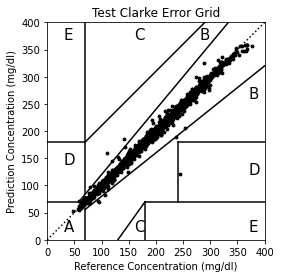

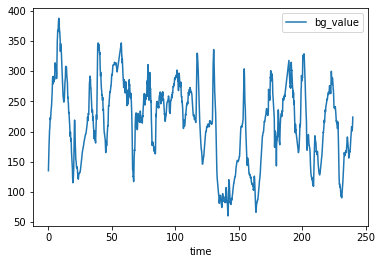

2021-06-26 09:07:14.215 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-26 09:07:14.216 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/570_test_0_6_1.pkl
2021-06-26 09:07:15.217 | INFO     | __main__:run_model:28 - {'model': LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1974, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), 'model_name': 'LGBMRegressor', 'internal_cga_analysis': [3283, 8, 0, 2, 0], 'internal_rmse': 4.953370414014299, 'internal_rmadex': 38.012169699455534, 'unseen_cga_analysis': [2738, 1, 0, 0, 0], 'unseen_rmse

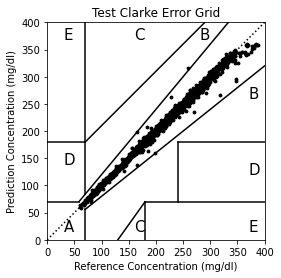

In [9]:
run_model(best3[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.1549,25.2690,5.0268,0.9939,0.0335,0.0196
1,2.7628,15.8240,3.9779,0.9959,0.0283,0.0174
2,2.7570,15.6501,3.9560,0.9962,0.0274,0.0172
3,2.9392,19.8989,4.4608,0.9947,0.0313,0.0185
4,3.0969,24.3907,4.9387,0.9934,0.0328,0.0193
5,3.1155,22.4073,4.7336,0.9945,0.0342,0.0201
6,3.3697,37.6948,6.1396,0.9900,0.0357,0.0206
7,2.9681,20.2712,4.5024,0.9943,0.0288,0.0180
8,3.1108,28.6427,5.3519,0.9923,0.0338,0.0195
9,2.8556,17.2962,4.1589,0.9957,0.0306,0.0184


2021-06-26 09:07:15.744 | INFO     | __main__:run_model:5 - Processing model: OrthogonalMatchingPursuit


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,13.3574,199.7885,14.1347,0.9490,0.0901,0.0830


2021-06-26 09:07:16.036 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/570_test_0_6_1.pkl
2021-06-26 09:07:16.056 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 570, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


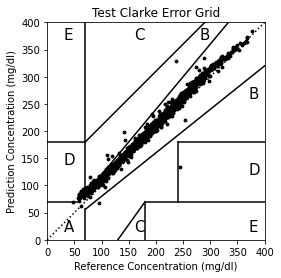

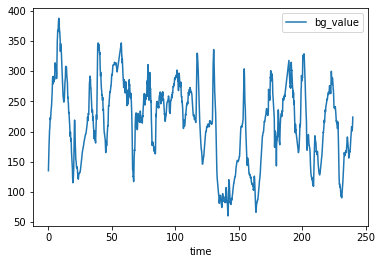

2021-06-26 09:07:16.318 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-26 09:07:16.319 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/570_test_0_6_1.pkl
2021-06-26 09:07:17.292 | INFO     | __main__:run_model:28 - {'model': OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None), 'model_name': 'OrthogonalMatchingPursuit', 'internal_cga_analysis': [3188, 55, 0, 50, 0], 'internal_rmse': 14.13465464121526, 'internal_rmadex': 27.407069621635554, 'unseen_cga_analysis': [2715, 15, 0, 9, 0], 'unseen_rmse': 13.840685925304921, 'unseen_rmadex': 12.208300069677744}


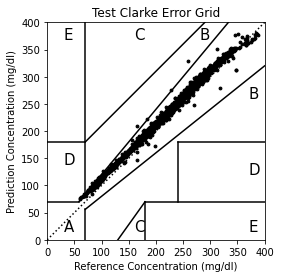

In [10]:
run_model(best3[1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.3095,30.1109,5.4873,0.9927,0.0354,0.0201
1,2.8855,17.3842,4.1694,0.9955,0.0278,0.0177
2,2.9143,19.7804,4.4475,0.9951,0.0304,0.0178
3,2.9509,22.5759,4.7514,0.9940,0.0302,0.0181
4,3.1629,24.7876,4.9787,0.9933,0.0306,0.0189
5,3.2417,22.4248,4.7355,0.9945,0.0312,0.0202
6,3.3519,37.4844,6.1224,0.9901,0.0374,0.0203
7,3.0666,21.6500,4.6530,0.9939,0.0278,0.0181
8,3.0665,21.2993,4.6151,0.9943,0.0348,0.0195
9,2.9520,17.1118,4.1366,0.9957,0.0286,0.0184


2021-06-26 09:08:04.818 | INFO     | __main__:run_model:5 - Processing model: GradientBoostingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3.0181,24.9627,4.9963,0.9936,0.0307,0.0180


2021-06-26 09:08:05.097 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/570_test_0_6_1.pkl
2021-06-26 09:08:05.116 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 570, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


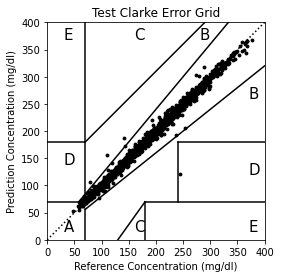

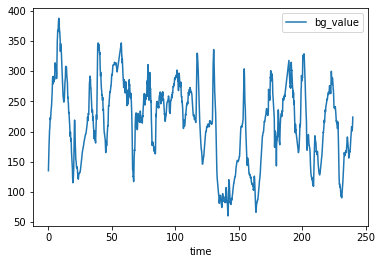

2021-06-26 09:08:05.376 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-26 09:08:05.376 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/570_test_0_6_1.pkl
2021-06-26 09:08:06.370 | INFO     | __main__:run_model:28 - {'model': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1974, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=F

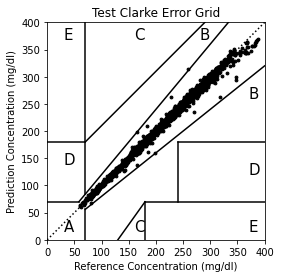

In [11]:
run_model(best3[2])

In [12]:
print(master_output)

{'LGBMRegressor': {'model': LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1974, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), 'model_name': 'LGBMRegressor', 'internal_cga_analysis': [3283, 8, 0, 2, 0], 'internal_rmse': 4.953370414014299, 'internal_rmadex': 38.012169699455534, 'unseen_cga_analysis': [2738, 1, 0, 0, 0], 'unseen_rmse': 4.848917437174007, 'unseen_rmadex': 7.282940356439859}, 'OrthogonalMatchingPursuit': {'model': OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None), 'model_name': 'OrthogonalMatchingPursuit', 'internal_cga_analysis': [3188,

In [13]:
pandas.DataFrame.from_dict(master_output, orient='index')

,model,model_name,internal_cga_analysis,internal_rmse,internal_rmadex,unseen_cga_analysis,unseen_rmse,unseen_rmadex
LGBMRegressor,"LGBMRegressor(boosting_type='gbdt', class_weig...",LGBMRegressor,"[3283, 8, 0, 2, 0]",4.953370,38.012170,"[2738, 1, 0, 0, 0]",4.848917,7.282940
OrthogonalMatchingPursuit,"OrthogonalMatchingPursuit(fit_intercept=True, ...",OrthogonalMatchingPursuit,"[3188, 55, 0, 50, 0]",14.134655,27.407070,"[2715, 15, 0, 9, 0]",13.840686,12.208300
GradientBoostingRegressor,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",GradientBoostingRegressor,"[3288, 4, 0, 1, 0]",4.996265,38.718477,"[2738, 1, 0, 0, 0]",4.844579,7.042097


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d560f233-0034-499f-bc4e-7ada8795cb9f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>